# Atsiskaitomasis darbas

## 1 dalis

In [1]:
import pandas as pd

data = pd.read_csv('hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
# 1. Suskaičiuokite kiek yra trūkstamų reikšmių kiekviename stulpelyje data duomenyse. 
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [3]:
# 2. Kiek stulpelių ir eilučių turi data lentelė?
data.shape

(17379, 17)

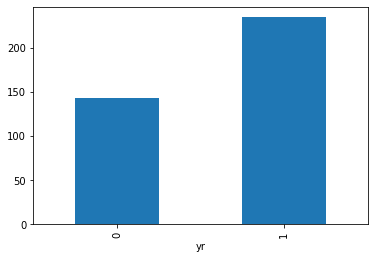

In [4]:
# 3. Suskaičiuokite 'cnt' vidurkį atskirai pagal metus ir mėnesį. Pabandykite vizualizuoti šią informaciją.

# data.info()
# data['dteday'] = pd.to_datetime(data['dteday'])
# # data.info()
# data['month'] = data['dteday'].dt.month
# data['year'] = data['dteday'].dt.year
# data.head()

data.groupby(['yr'])['cnt'].mean().plot(kind = 'bar')

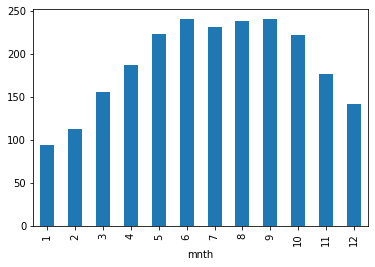

In [5]:
data.groupby(['mnth'])['cnt'].mean().plot(kind = 'bar')

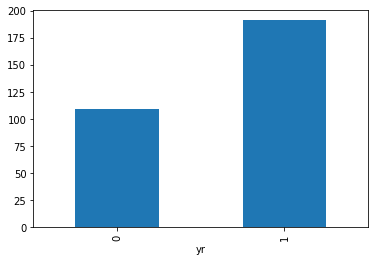

In [6]:
# 4. Suskaičiuokite 'cnt' medianą atskirai pagal metus, mėnesį, ir savaitės dieną.
data.groupby(['yr'])['cnt'].median().plot(kind = 'bar')

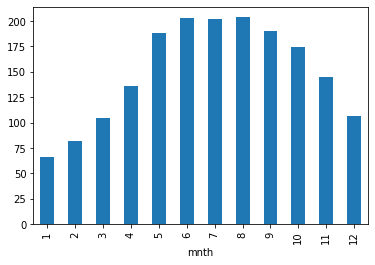

In [7]:
data.groupby(['mnth'])['cnt'].median().plot(kind = 'bar')

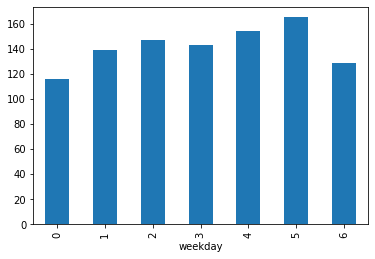

In [8]:
data.groupby(['weekday'])['cnt'].median().plot(kind = 'bar')

In [9]:
# 5. Pakeiskite 'season' reikšmes: 1 -> Pavasaris, 2 -> Vasara, 3 -> Ruduo, 4 -> Žiema.
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
data['season'] = data['season'].astype(str)

In [11]:
data['season'] = data['season'].replace({'1':'Pavasaris', '2':'Vasara','3':'Ruduo','4':'Žiema'})

In [13]:
data['season'].unique()

array(['Pavasaris', 'Vasara', 'Ruduo', 'Žiema'], dtype=object)

In [14]:
# 6. Suskaičiuokite ir pateikite Spearman koreliacijos koeficientus tarp 'temp', 'atemp', 'humidity' ir 'windspeed'.

data.head()
data[['temp', 'atemp', 'hum', 'windspeed']].corr(method='spearman')

,temp,atemp,hum,windspeed
temp,1.000000,0.989633,-0.055408,-0.009719
atemp,0.989633,1.000000,-0.052617,-0.041091
hum,-0.055408,-0.052617,1.000000,-0.293913
windspeed,-0.009719,-0.041091,-0.293913,1.000000


In [15]:
# 7. Kuris is šiu kintamųjų ('temp', 'atemp', 'humidity', 'windspeed','casual', 'registered') turi didžiausią Pearson koreliacijos koeficientą su 'cnt'?

data.head()
data[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered','cnt']].corr(method='pearson')
# Atsakymas: registered

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


In [16]:
# 8. Kokia laikotarpį dengia data duomenys? Kiek a) dienų, b) valandų, c) minučių yra tarp seniausias ir naujausios datos 
# (t.y. skirtumas tarp seniausios ir naujausios datos)?

data['dteday'] = pd.to_datetime(data['dteday'])

In [17]:
max_ = data['dteday'].max()
min_ = data['dteday'].min()

print('days:', pd.Timedelta(max_ - min_).days)
print('hours:',pd.Timedelta(max_ - min_).days * 24)
print('minutes:',pd.Timedelta(max_ - min_).days * 24 * 60)

days: 730
hours: 17520
minutes: 1051200


# 2 dalis

In [1]:
from pandas_datareader import data

In [2]:
# IBM akcijų kainos laiko eilutės

ibm = data.DataReader(['IBM'], 'yahoo', start='2012-05-12')
ibm = ibm['High']
ibm.columns.name = None
ibm.head()

,IBM
Date,
2012-05-14,200.710007
2012-05-15,201.470001
2012-05-16,201.350006
2012-05-17,200.789993
2012-05-18,198.779999


In [3]:
# 1. Kiek stulpelių ir eilučių turi data lentelė?

ibm.shape

(2072, 1)

In [4]:
# 2. Ištraukite akcijų kainas paskutine kiekvienos savaitės dieną?

ibm.asfreq(freq='W-MON')

,IBM
Date,
2012-05-14,200.710007
2012-05-21,197.929993
2012-05-28,NaN
2012-06-04,189.380005
2012-06-11,196.699997
...,...
2020-07-06,121.849998
2020-07-13,120.989998
2020-07-20,127.070000


In [5]:
# 3. Suskaičiuokite vidutinę kiekvieno mėnesio akcijos kainą?

ibm.resample('M').mean()

,IBM
Date,
2012-05-31,198.195384
2012-06-30,195.235239
2012-07-31,192.402382
2012-08-31,198.818696
2012-09-30,204.701055
...,...
2020-04-30,120.754285
2020-05-31,122.564000
2020-06-30,125.713637


In [6]:
# 4. Suskaičiuokite 7 dienų slenkantį kainos vidurkį. Pabandykite vizualizuoti šią informaciją.

ibm['rolling'] = ibm.rolling(7, center=True).mean()

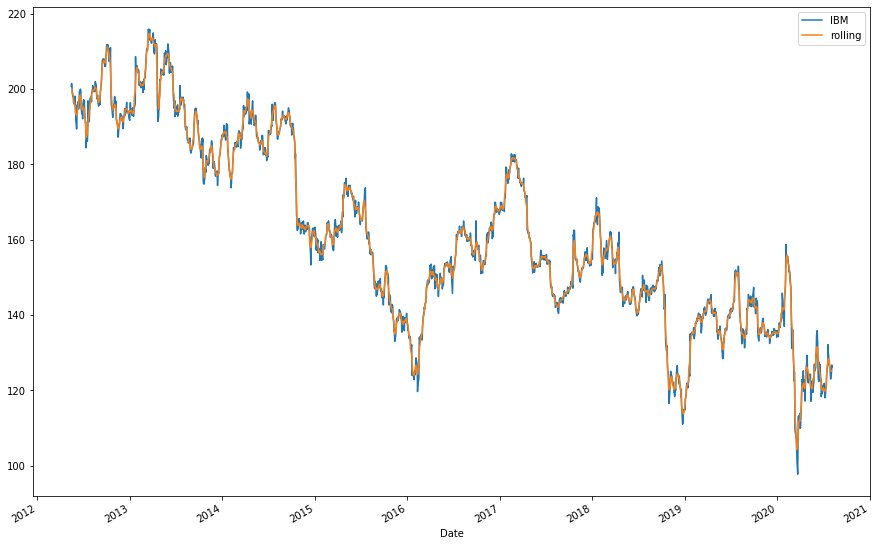

In [7]:
ibm.plot(figsize=(15, 10), legend=True)

In [42]:
# 5. Kurią savaitę tiriamame laikorpyje akcijos kaina buvo didžiausia ir mažiausia?

# maziausia
ibm.resample('W').min().sort_values(by= ['IBM'], ascending = [True]).head(1)

,IBM,rolling
Date,,
2020-03-29,97.739998,105.860001


In [44]:
# didziausia
ibm.resample('W').max().sort_values(by= ['IBM'], ascending = [False]).head(1)

,IBM,rolling
Date,,
2013-03-17,215.899994,214.327142


In [43]:
# 6. Kurią savaitę tiriamame laikorpyje 7 dienų slenkančio vidurkio kaina buvo didžiausia ir mažiausia? 

# maziausia
ibm.resample('W').min().sort_values(by= ['rolling'], ascending = [True]).head(1)

,IBM,rolling
Date,,
2020-03-22,100.989998,104.314286


In [35]:
# didziausia
ibm.resample('W').max().sort_values(by= ['rolling'], ascending = [False]).head(1)

,IBM,rolling
Date,,
2013-03-24,215.820007,214.767142


## 3 dalis

In [15]:
import pandas as pd
ratings = pd.read_csv('ratings.csv')
movie_titles = pd.read_csv('movie_titles.csv')
tags = pd.read_csv('tags.csv')

movies = pd.merge(ratings, movie_titles, on=['movieId'], how='left')
movies = pd.merge(movies, tags.drop(columns=['userId']), on='movieId', how='left')

In [16]:
movies.head()

,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,1.139046e+09
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,1.137207e+09
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun,1.525286e+09
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy,1.143425e+09
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old,1.143425e+09


In [20]:
# 1. Kurie 5 filmų žanrai ('genres') turi aukščiausi vidutinį reitingą?

movies.groupby(['genres'])['rating'].mean().sort_values(ascending = [False]).head()

genres
Animation|Drama|Fantasy|Mystery         5.0
Comedy|Crime|Drama|Horror               5.0
Comedy|Drama|Fantasy|Mystery|Romance    5.0
Adventure|Romance|Sci-Fi                5.0
Animation|Crime|Drama                   5.0
Name: rating, dtype: float64

In [21]:
# 2. Kuris filmas/ai yra seniausias šioje lentelėje?

movies['metai'] = movies['title'].str.extract('.*\((.*)\).*')

In [23]:
movies.groupby('title')['metai'].min().sort_values(ascending = [True]).head(1)

title
Trip to the Moon, A (Voyage dans la lune, Le) (1902)    1902
Name: metai, dtype: object

In [24]:
# 3. Ištraukite tekstą iš "title" ir apkeiskite raidžių tvarką atvirkštine tvarka. Pvz.: Toy -> yoT.

movies['title'].transform(lambda x: x[::-1])

0                       )5991( yrotS yoT
1                       )5991( yrotS yoT
2                       )5991( yrotS yoT
3                )5991( neM dlO reipmurG
4                )5991( neM dlO reipmurG
                       ...              
285757                      )7102( nagoL
285758                      )7102( nagoL
285759                      )7102( nagoL
285760                      )7102( nagoL
285761    )7102( suoiruF eht fo etaF ehT
Name: title, Length: 285762, dtype: object

In [28]:
# 4. Kuris vartojas vidutiniškai paliko aukščiausius reitingus?

movies.groupby(['userId'])['rating'].mean().sort_values(ascending = [False]).head(1)

userId
53    5.0
Name: rating, dtype: float64

In [32]:
# 5. Kuris filmas yra geriausiai reitinguojamas?

movies.groupby(['movieId'])['rating'].mean().sort_values(ascending = [False]).head(1)

movieId
53355    5.0
Name: rating, dtype: float64